In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import math
import scipy

In [2]:
def numpy_eig(a):
    w, v = np.linalg.eig(a)
    return w, v

In [3]:
def vec_mod(n):
    return math.sqrt(sum([i ** 2 for i in n]))


def inverse_eig_2(a, iterations, epsilon, par):
    b  = a - par * np.diag(np.ones(a.shape[0]))
    (lu, piv) = scipy.linalg.lu_factor(b)
    
    x = np.random.rand(a.shape[0])
    x = x / np.linalg.norm(x)
    i = 0
    
    while (i < iterations):
        xtmp = x
        w = scipy.linalg.lu_solve((lu, piv), x)
        x = w / np.linalg.norm(w)
        l = np.transpose(x) @ a @ x
        if 2 - vec_mod(xtmp - x) < epsilon:
            break
        i += 1
    return l, x, i

In [4]:
def gen_matrix(n):
    return [[0 for i in range(n)] for j in range(n)]

In [5]:
def read_graph(path, g):
    file = open(path, 'r')
    for line in file:
        words = line.split()
        g[int(words[0])][int(words[1])] = 1        

In [6]:
def get_succ(g, v): # F
    succ = []
    for i in range(len(g)):
        if g[v][i] != 0:
            succ.append(i)
    return succ

In [7]:
def get_pred(g, v): # B
    pred = []
    for i in range(len(g)):
        if g[i][v] != 0:
            pred.append(i)
    return pred

In [8]:
def v_norm(g, v):
    n = len(get_succ(g, v))
    return n

In [9]:
def g_norm(g):
    n = len(g)
    for r in range(n):
        for c in range(n):
            if g[r][c] == 1:
                g[r][c] /= v_norm(g, r)

In [10]:
def r_fun(g, u, c):
    if (get_pred(g, u) == []):
        return 1.0
    pred = get_pred(g, u)
    return c * sum([r_fun(g, v, c) / v_norm(g, v) for v in pred if v_norm(g,v) != 0])

In [11]:
def plot_graph(g):
    G = nx.to_networkx_graph(np.array(g), create_using=nx.DiGraph())
    plt.figure(figsize=(7, 7))
    nx.draw(G, with_labels=True)
    plt.show()

In [12]:
g = gen_matrix(5)
read_graph("in.txt", g)
g_norm(g)
print(np.array(g))

[[ 0.   0.5  0.   0.5  0. ]
 [ 0.   0.   0.   1.   0. ]
 [ 0.   0.   0.   1.   0. ]
 [ 0.   0.   0.   0.   0. ]
 [ 0.   1.   0.   0.   0. ]]


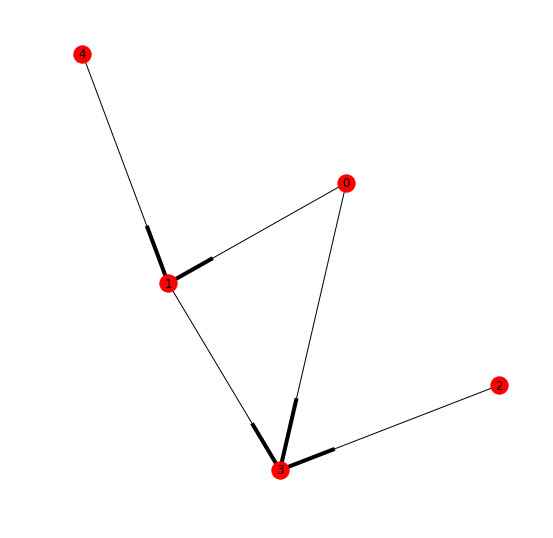

In [13]:
plot_graph(g)

In [14]:
c = 1.0
ranking = [r_fun(g, u, c) for u in range(5)]
m = max(ranking)
R = [e/m for e in ranking]
print(R)

[0.3333333333333333, 0.5, 0.3333333333333333, 1.0, 0.3333333333333333]


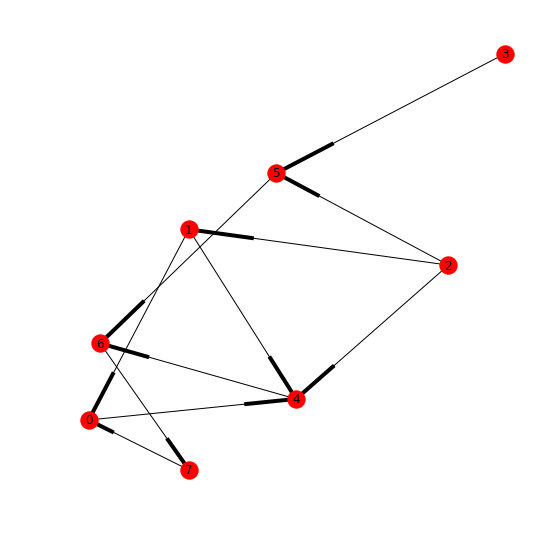

In [45]:
g = gen_matrix(8)
read_graph("in2.txt", g)
g_norm(g)
plot_graph(g)

In [44]:
c = 1.0
ranking = [r_fun(g, u, c) for u in range(8)]
m = max(ranking)
R = [e/m for e in ranking]
print(R)

Exception ignored in: 'zmq.backend.cython.message.Frame.__dealloc__'
Traceback (most recent call last):
  File "zmq/backend/cython/checkrc.pxd", line 12, in zmq.backend.cython.checkrc._check_rc (zmq\backend\cython\message.c:4294)
    PyErr_CheckSignals()
KeyboardInterrupt: 


RecursionError: maximum recursion depth exceeded in comparison

In [39]:
def r_fun_iter(g, iterations, epsilon, e):
    i = 0
    r0 = e
    while (i < iterations):
        r1 = g @ r0
        d = np.linalg.norm(r0, ord=1) - np.linalg.norm(r1, ord=1)
        r1 += d * e
        delta = np.linalg.norm(r1 - r0, ord=1)
        if (delta <= epsilon):
            break
        r0 = r1
        i += 1
    return r0

In [41]:
def r_fun2(g, u, c, e):
    if (get_pred(g, u) == []):
        return 1.0
    pred = get_pred(g, u)
    return c * sum([r_fun(g, v, c) / v_norm(g, v) for v in pred if v_norm(g,v) != 0]) + c*e[u]

In [46]:
e = [1/8 for i in range(8)]
c = 1.0
ranking = [r_fun(g, u, c) for u in range(8)]
m = max(ranking)
R = [e/m for e in ranking]
print(R)

RecursionError: maximum recursion depth exceeded in comparison